In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('./datasets/digit-recognizer/train.csv');

In [39]:
print(data.shape)
l=data["label"]
d=data.drop("label",axis=1)
l=l[0:5000]
d=d[0:5000]

(42000, 785)
      pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          0       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          0       0       0       0       0       0       0       0       0   
3          0       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
4995       0       0       0       0       0       0       0       0       0   
4996       0       0       0       0       0       0       0       0       0   
4997       0       0       0       0       0       0       0       0       0   
4998       0       0       0       0       0       0       0       0       0   
4999       0       0       0       0       0       0       0       0       0   

      pixel9  ...  pixel77

In [40]:
from sklearn.preprocessing import StandardScaler
scale_data=StandardScaler().fit_transform(d);

In [45]:
from sklearn.manifold import TSNE
model=TSNE(n_components=2,random_state=0,n_iter=3000, perplexity=30) #default perplexity is 30 and default no of iteration is 1000

In [46]:
tsne_data=model.fit_transform(scale_data)
print(tsne_data)

[[-64.26792  -19.088219]
 [ 53.02801   54.648502]
 [-17.063925 -17.427721]
 ...
 [-71.363335  15.263034]
 [-24.34533  -72.11071 ]
 [-31.988487 -66.62661 ]]


In [47]:
new_coordinates=np.vstack((tsne_data.T,l)).T
dataframe=pd.DataFrame(data=new_coordinates,columns=("2nd_principal","1st_principal","labels"))
print(dataframe.head())

   2nd_principal  1st_principal  labels
0     -64.267921     -19.088219     1.0
1      53.028011      54.648502     0.0
2     -17.063925     -17.427721     1.0
3      43.231892     -44.051857     4.0
4      61.533051      59.033169     0.0


/home/sambhav/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


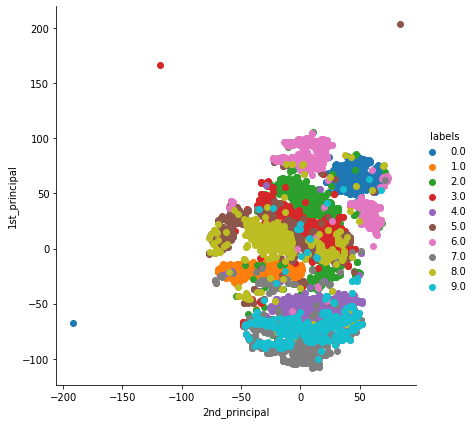

In [48]:
import seaborn as sn
sn.FacetGrid(dataframe, hue="labels",size=6).map(plt.scatter,"2nd_principal","1st_principal").add_legend()
plt.show()